## **Data Preparation**

### Load Datasdet

In [54]:
# Import a necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [55]:
# Load dataset
sc= r'C:\Users\fahru\Documents\Python_Code\Cohort\Dataset.csv'
data= pd.read_csv(sc)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Exploration Data Analysis

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Missing Data Handling

In [57]:
# Missing Data check
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are missing data especially in CustomerID columns. Drop missing data in CustomerID column is necessary because that variabel will be our considering varibael for futhur analysis.

In [58]:
# Drop missning Data
data=data.dropna(subset='CustomerID')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [59]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Data Type Handling

In [60]:
# Data type Check
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [61]:
# Datetime Hanling (timestamp)
import dateutil
from datetime import datetime as dt
from pytz import utc

data['Timestamp']=  data['InvoiceDate'].apply(lambda x: dateutil.parser.parse(x).timestamp())
data['Year']= data['Timestamp'].apply(lambda x: dt.fromtimestamp(x,utc).year)
data['Month']= data['Timestamp'].apply(lambda x: dt.fromtimestamp(x,utc).month)
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Timestamp,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.291167e+09,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291167e+09,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.291167e+09,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291167e+09,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291167e+09,2010,12


Timestamp helful to keep originaly datetime in utc timezone. 

In [62]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Timestamp      float64
Year             int64
Month            int64
dtype: object

## **Analysis**

In [63]:
# Create COhort
data['Cohort']= data.apply(lambda x: (x['Year']*100+x['Month']), axis=1)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Timestamp,Year,Month,Cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.291167e+09,2010,12,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291167e+09,2010,12,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.291167e+09,2010,12,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291167e+09,2010,12,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291167e+09,2010,12,201012


In [64]:
# Create First Cohort
cohort= data.groupby('CustomerID')['Cohort'].min().reset_index()
cohort.columns= ['CustomerID','First_Cohort']
data= data.merge(cohort, on='CustomerID', how='left')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Timestamp,Year,Month,Cohort,First_Cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.291167e+09,2010,12,201012,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291167e+09,2010,12,201012,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.291167e+09,2010,12,201012,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291167e+09,2010,12,201012,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291167e+09,2010,12,201012,201012


In [65]:
# Create Cohort header
head= data['Cohort'].value_counts().reset_index()
head= head.sort_values('Cohort')['Cohort'].tolist()
head

[201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112]

Cohort header is the array of unique cohort. This way help to identify cohort distance efectly. Cohort distance will calculate by array index that very helpfully when we facing different year data of datetime.


In [66]:
# Create Cohort DIstance
data['Cohort_Distance']= data.apply(lambda x: (head.index(x['Cohort'])-head.index(x['First_Cohort'])) 
                                     if (x['Cohort']!=0 and x['First_Cohort']!=0) else np.nan, axis=1)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Timestamp,Year,Month,Cohort,First_Cohort,Cohort_Distance
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.291167e+09,2010,12,201012,201012,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291167e+09,2010,12,201012,201012,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.291167e+09,2010,12,201012,201012,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291167e+09,2010,12,201012,201012,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291167e+09,2010,12,201012,201012,0


In [67]:
# Craete Pivot Data
pivot= pd.pivot_table(data,index='First_Cohort',columns='Cohort_Distance',
                      values='CustomerID',aggfunc= pd.Series.nunique )
pivot= pivot.div(pivot[0],axis=0)
pivot

Cohort_Distance,0,1,2,3,4,5,6,7,8,9,10,11,12
First_Cohort,,,,,,,,,,,,,
201012,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
201101,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
201102,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
201103,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
201104,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
201105,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
201106,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
201107,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Create Cohort size Table
data['Label']= pd.to_datetime(data['First_Cohort'],format=('%Y%m'))
data['Label']= data['Label'].dt.strftime('%b %Y')
size= data['Label'].value_counts()
size= pd.DataFrame(size)
size.columns=['Cohort Size']
size

,Cohort Size
Label,
Dec 2010,177272
Jan 2011,49047
Mar 2011,33646
Feb 2011,30136
Apr 2011,19547
Oct 2011,16428
May 2011,15607
Sep 2011,14419
Jun 2011,13686


## **Result**

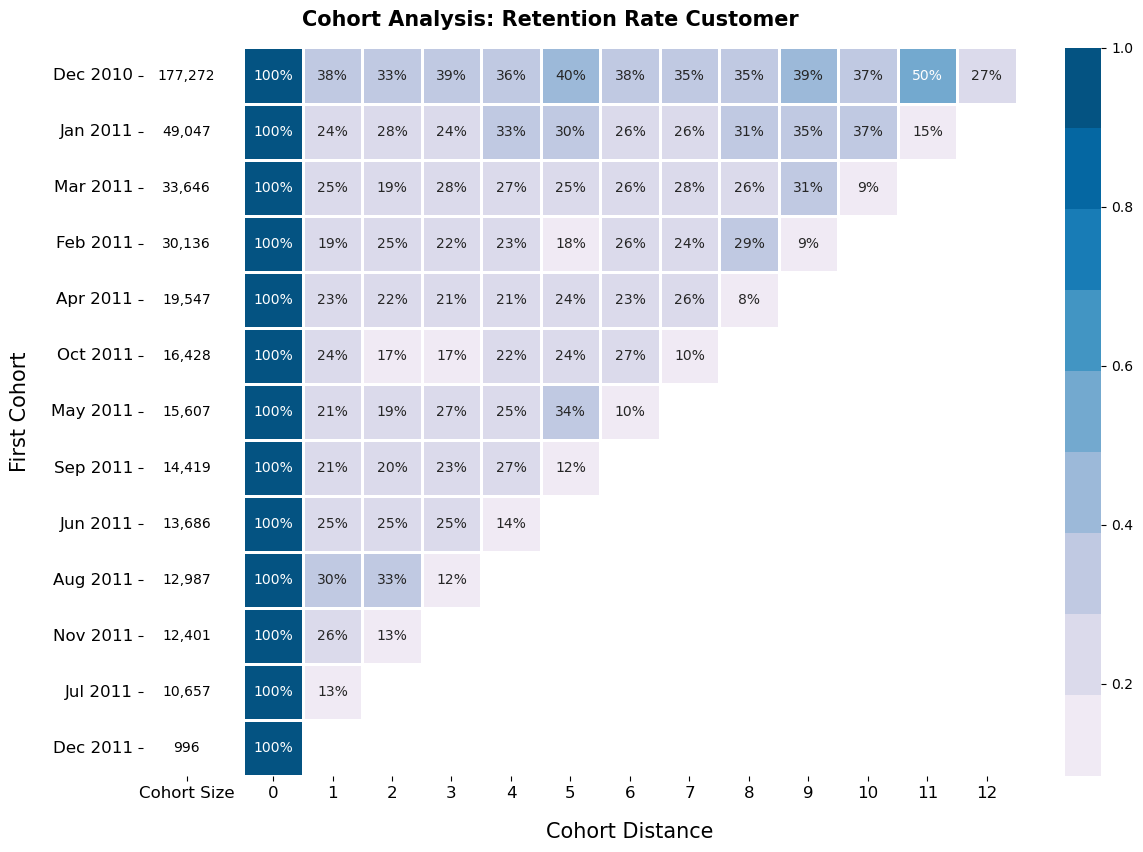

In [113]:
# Cretae Visualize of Result
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

sns.heatmap(pivot, annot=True,fmt='.0%', annot_kws={'size':10},ax=ax[1],linewidths=2, mask=pivot.isnull(),
            cmap=sns.color_palette('PuBu',(9)))
ax[1].set_xlabel('Cohort Distance', size=15, labelpad=15)
ax[1].set_ylabel("")
ax[1].tick_params(axis='x',labelsize=12)
ax[1].tick_params(left=False)

sns.heatmap(size,annot=True, ax=ax[0], cbar=False, fmt=',', annot_kws={'size':10,
                                                                     'color':'black'},
            cmap=sns.color_palette('PuBuGn_d',(0)))
ax[0].set_ylabel('First Cohort',size=15, labelpad=15)
ax[0].tick_params(axis='both', labelsize=12)

fig.tight_layout(pad=0)
plt.suptitle('Cohort Analysis: Retention Rate Customer',x=0.45,y=1.04,size=15,weight='bold')
plt.show()